Buenas buenas, proyecto de calculito numeriquito por:
Angel De Crescenzo 27.851.257
Regina Escalona 30.681.671

Como obtenemos los datos es usando una API de datos meteorologicos mundiales usando el
"Location" como una variable String que es colocando el nombre de una ciudad en INGLES

"Start_date" fecha inicio del rango
"End_date" fecha de fin del rango

url es donde se va a llamar a la api en la web y colocando las variables en sus respectivos lugares
en la direccion usando por ejemplo "$(location)"

la api da un archivo JSON para leer todo en String, al leerlo solo buscamos una variable
que es la temperatura media y de una vez lo pasamos a un float de 64

In [20]:
using HTTP
using JSON

location = "Schweinfurt"

start_date = "2023-01-20"
end_date = "2023-01-26" 

url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?q=$(location)&tp=24&date=$(start_date)&enddate=$(end_date)&format=json&key=790e4819ffc841c5b1810355241106"

response = HTTP.request("GET", url)

if response.status == 200
    data = JSON.parse(String(response.body))
    println("Datos de la semana del $start_date al $end_date de $location obtenidos correctamente")
else
    println("Error al obtener datos de la semana del $start_date al $end_date: $(response.status)")
end

temps_media = []

for day in data["data"]["weather"]
    temp_media = day["avgtempC"]

    push!(temps_media, parse(Float64, temp_media))
end

print(temps_media)


Datos de la semana del 2023-01-20 al 2023-01-26 de Schweinfurt obtenidos correctamente
Any[-1.0, -2.0, -0.0, -0.0, 1.0, -0.0, -0.0]

El panita lagrange, en la funcion lagrange le damos 3 parametros x, y, z, indicando que x es el numero de dias la cual estamos haciendo la interpolacion en forma de lista y la y es la lista de las temperaturas correspondientes a esos dias, en la parte de la variable multiplicacion lo que hacemos es sacar el factor de lagrange


el total es: [-1.0, -1.0, -1.723417938589918, -2.2942195261591407, -2.730355883878682, -3.0484249523720783, -3.2637328668341827, -3.39035404369367, -3.441189978819281, -3.4280267572698038, -3.36159127458778, -3.251606169636941, -3.106843468983386, -2.9351769428204832, -2.7436331724375034, -2.538441329231982, -2.32508166526583, -2.1083327153651523, -2.0, -1.8923172107638149, -1.6805467042907356, -1.4759649071009127, -1.2809897369501773, -1.0975540780136837, -0.9271452522481324, -0.7708432022977167, -0.6293573859438089, -0.5030623820983738, -0.39203220834111835, -0.2960733500003671, -0.21475650077767366, -0.14744701491616216, -0.09333407091260183, -0.05145854677320983, -0.02073960681318986, 0.0, 0.0, 0.012009930159646957, 0.016589524189051796, 0.015066373667065383, 0.008776176709893405, -0.0009561180908304323, -0.012833879273702664, -0.025605071656940925, -0.03807724703150489, -0.049131246397950704, -0.0577336137470157, -0.06294772138393535, -0.06394360679649193, -0.06000652106679455, -0

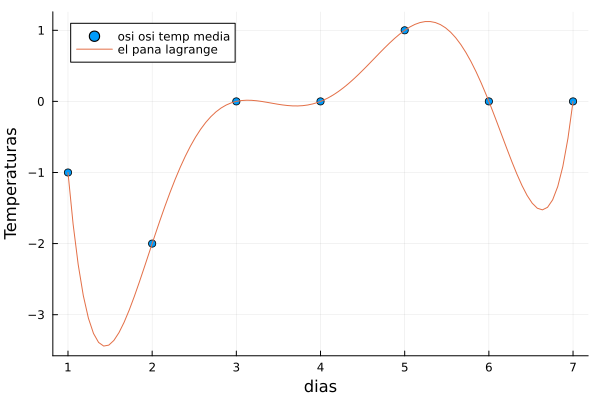

In [78]:
using Plots

y = temps_media
x = [1, 2, 3 , 4, 5, 6, 7]

function lagrange(x, y, z)
    n = length(x)
    total = 0
    for i in 1:n
        multiplicacion = y[i]
        for j in 1:n
            if i !=j
                multiplicacion *= (z - x[j])/ (x[i]-x[j])
            end
        end
        total += multiplicacion
    end
    return total
end
intex = sort(vcat(x, range(minimum(x), stop=maximum(x), length=100)))
intey = [lagrange(x, y, z) for z in intex]
print("el total es: ")

print(intey)
scatter(x, y, label="osi osi temp media")
plot!(intex, intey, label="el pana lagrange", xlabel="dias", ylabel="Temperaturas")

Taylor xdddddddddddd
Este código en Julia realiza una aproximación de Taylor de grado 6 para los datos de temperatura media en función de los días. Primero, se definen funciones para el cálculo del factorial, las derivadas mediante diferencias divididas y la aproximación de Taylor. Luego, se generan valores para la interpolación y se calculan los valores interpolados utilizando la aproximación de Taylor. Finalmente, se grafican los datos originales y la aproximación de Taylor para visualizar la aproximación polinomial

LOS ERRORES:
se imprime la interpolacion y se puede apreciar unos picos no convencionales en la interpolacion, el error debe de estar en la parte de derivadita pero esto implica el cambio de varias cosas, igualmente si se coloca mas datos esto funciona mejor, y es mas cercana a las otras graficas SI SE PUEDE VER que se parece a las demas gracias sobretodo a la del panita hermite, porque esta en la derivada el error? el trabajo de la derivada es suavizar la curba  terminar de hacer la conexion entre puntos de la grafica mas suavez y entendibles.


[-1.0, -1.0552775249580262, -1.1005886151318776, -1.136897772955916, -1.1650816710955445, -1.1859373787449226, -1.2001892994684098, -1.208494820585743, -1.2114486741009438, -3.175541615871853, -2.980718203534908, -2.799836153025453, -2.631524020341382, -2.4745619491864885, -2.3278664077192883, -2.190476015534072, -2.0615384608741736, -1.9402985080774817, -1.8260870952541606, -1.7183115221966112, -1.6164467285216548, -1.520027662044942, -1.428642737387593, -1.3419283848150594, -1.2595646893082177, 0.19084650587515528, 0.1375337705594566, 0.09510708352690093, 0.06216405304693503, 0.03744580159489286, 0.019824700739441994, 0.00829284937018311, 0.0019512952654060973, 0.0, 0.0017285471935179907, 0.006507594098397123, 0.013781066528332898, 0.023059097126808637, 0.03391170697577973, 0.045963230544512276, 0.05888748397857736, 0.07240367672899933, -0.7161109138588323, -0.5841353741567967, -0.4652034750800186, -0.3582385534565282, -0.2622449454132245, -0.17630241132471566, -0.09956085809821573, 

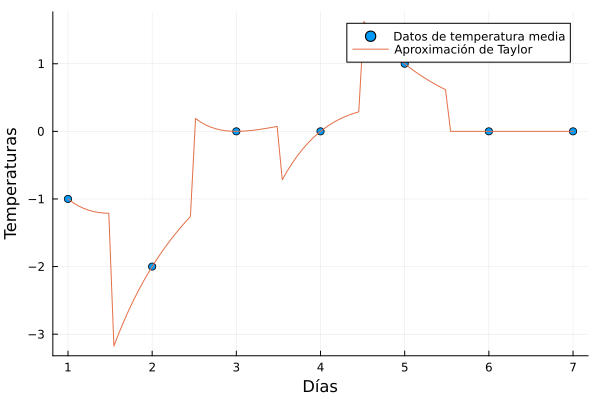

In [42]:
using Plots

y = temps_media  # Valores de temperatura media
x = [1, 2, 3, 4, 5, 6, 7]  # Valores de días

function factorial(n)
    if n == 0
        return 1
    else
        return n * factorial(n-1)  # Cálculo factorial recursivo
    end
end

function derivadita(y, z, n)
    # Función para calcular derivadas mediante diferencias divididas hacia adelante
    h = 1  # Espaciado entre los puntos
    if n == 0
        return y[z]
    elseif z + 1 > length(y)
        return 0
    else
        return (derivadita(y, z + 1, n-1) - derivadita(y, z, n-1)) / h
    end
end

function taylor(y, a, z, n)
    # Función para calcular la aproximación de Taylor de grado 6
    n = min(n, 6)  # Limita el grado del polinomio a 6
    suma = 0
    for i in 0:n
        suma += derivadita(y, a, i) / factorial(i) * (z - a)^i  # Suma de términos del polinomio de Taylor
    end
    return suma
end

intex_t = range(minimum(x), stop=maximum(x), length=100)  # Rango de valores para la interpolación
intey_t = [taylor(y, round(Int, i), i, 6) for i in intex_t]  # Calcula los valores interpolados con el método de Taylor

print(intey_t)  # Imprime los valores interpolados
scatter(x, y, label="Datos de temperatura media")  # Grafica los puntos de datos
plot!(intex_t, intey_t, label="Aproximación de Taylor", xlabel="Días", ylabel="Temperaturas")  # Grafica la aproximación de Taylor


Este código  realiza una interpolación con el pana de Hermite para suavizar una serie de datos. Primero, se calculan las derivadas de los puntos dados. Luego, se realiza la interpolación de Hermite en los puntos de interés, utilizando las derivadas para ajustar la curva de manera más suave. Finalmente, se grafican los datos originales junto con la curva interpolada para visualizar el resultado.

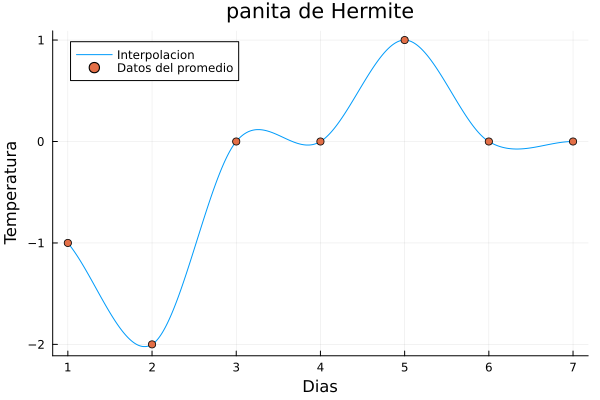

In [46]:
using Plots

y = temps_media
x = [1, 2, 3 , 4, 5, 6, 7]

function derivada(x, y)
    n = length(x)  # Cantidad de elementos en x
    dy = zeros(n)  # Crea un arreglo de ceros del mismo tamaño que x

    dy[1] = (y[2] - y[1]) / (x[2] - x[1])  # Deriva el primer punto

    dy[end] = (y[end] - y[end-1]) / (x[end] - x[end-1])  # Deriva el último punto

    for i in 2:n-1
        dy[i] = (y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1])  # Deriva los puntos intermedios
    end

    return dy
end

function buscarin(x_interp, x1, x2)
    indices = []  # Arreglo para almacenar índices
    for (i, val) in enumerate(x_interp)
        if x1 <= val <= x2
            push!(indices, i)  # Agrega el índice si el valor está en el rango
        end
    end
    return indices
end

function hermite(x, y, dy, xinter)
    n = length(x)  # Cantidad de elementos en x
    yinter = similar(xinter)  # Crea un arreglo vacío del mismo tamaño que xinter

    for i in 1:n-1
        h = x[i + 1] - x[i]  # Calcula el paso entre los puntos

        t = (xinter .- x[i]) / h  # Valores normalizados para la interpolación de Hermite

        h00 = 2 .* t.^3 .- 3 .* t.^2 .+ 1
        h10 = t.^3 .- 2 .* t.^2 .+ t
        h01 = -2 .* t.^3 .+ 3 .* t.^2
        h11 = t.^3 .- t.^2

        idx = buscarin(xinter, x[i], x[i + 1])  # Encuentra los índices en el rango

        for j in idx
            yinter[j] = h00[j] * y[i] + h10[j] * h * dy[i] + h01[j] * y[i + 1] + h11[j] * h * dy[i + 1]  # Interpolación de Hermite
        end
    end
    return yinter
end

dy = derivada(x, y)  # Calcula las derivadas

xv = range(minimum(x), stop=maximum(x), length=1000)  # Genera puntos para suavizar la línea
yinterh = hermite(x, y, dy, xv)  # Realiza la interpolación de Hermite

plot(xv, yinterh, label="Interpolacion")  # Grafica la interpolación
scatter!(x, y, label="Datos del promedio")  # Agrega puntos de datos
plot!(title = "panita de Hermite", xlabel = "Dias", ylabel = "Temperatura")  # Añade título y etiquetas


Este código en Julia realiza una interpolación polinómica a trozos de un conjunto de datos de temperatura en función de los días. Aquí tienes una explicación detallada de lo que hace el código:

Se definen los valores de temperatura y y los días 
x.
Se define una función Trozos que realiza la interpolación a trozos. Esta función busca el intervalo al que pertenece el punto z en los datos de días x, calcula la pendiente m en ese intervalo y realiza la interpolación lineal para obtener el valor interpolado en el punto
 z.
Se define la función interpolacionTrozos que aplica la interpolación a trozos a un conjunto de puntos de evaluación intex_tt utilizando los datos de días x y temperatura
s y.
Se generan los puntos de evaluación intex_tt en el rango de días de 1
 a 7.
Se realiza la interpolación a trozos en los puntos de evaluación utilizando la función interpolacionT
rozos.
Se imprime el resultado de la interpo
lación.
Se grafican los datos originales de temperatura y la interpolación polinómica a
 trozos.
Se añaden etiquetas a los ejes y al título del gráfico para mayor claridad en la visua
lización.

[-1.0, -1.0606060606060606, -1.121212121212121, -1.1818181818181819, -1.2424242424242424, -1.303030303030303, -1.3636363636363635, -1.4242424242424243, -1.4848484848484849, -1.5454545454545454, -1.606060606060606, -1.6666666666666667, -1.7272727272727273, -1.7878787878787878, -1.8484848484848484, -1.9090909090909092, -1.9696969696969697, -1.9393939393939394, -1.8181818181818183, -1.6969696969696972, -1.5757575757575761, -1.4545454545454541, -1.333333333333333, -1.212121212121212, -1.0909090909090908, -0.9696969696969697, -0.8484848484848486, -0.7272727272727275, -0.6060606060606064, -0.4848484848484844, -0.3636363636363633, -0.2424242424242422, -0.1212121212121211, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030303030303030276, 0.09090909090909083, 0.15151515151515138, 0.21212121212121193, 0.2727272727272725, 0.33333333333333304, 0.3939393939393936, 0.45454545454545414, 0.5151515151515156, 0.5757575757575761, 0.6363636363636367, 0.696969696969

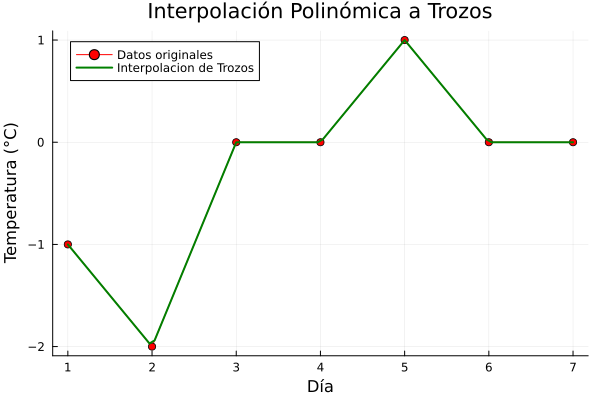

In [90]:
using Plots

y = temps_media
x = [1, 2, 3 , 4, 5, 6, 7]

function Trozos(z, x, y)
    i = searchsortedfirst(x, z)
    if i == 1
        i = 2
    elseif i == length(x) + 1
        i = length(x)
    end
    x0, x1 = x[i-1], x[i]
    y0, y1 = y[i-1], y[i]
    m = (y1 - y0) / (x1 - x0)
    return y0 + m * (z - x0)
end

function interpolacionTrozos(x, y, intex_tt)
    intey_tt = [Trozos(z, x, y) for z in intex_tt]  # Changed 'x' to 'z' to match the loop variable
    return intey_tt
end

intex_tt = range(1, 7, length=100)
intey_tt = interpolacionTrozos(x, y, intex_tt)  # Changed 'x' and 'y' to 'días' and 'temperatura'

println(intey_tt)

plot(x, y, label="Datos originales", marker=:circle, color="red")
plot!(intex_tt, intey_tt, label="Interpolacion de Trozos", color="green", linewidth=2)  # Changed 'puntos_evaluación' to 'intex_tt'
xlabel!("Día")
ylabel!("Temperatura (°C)")
title!("Interpolación Polinómica a Trozos")
